In [1]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

# Category files

In [2]:
countries = ['US','GB','CA','DE','FR']
category_dict = defaultdict(dict)
for country in countries:
    with open (f'{country}_category_id.json') as file:
        response = json.load(file)
        for item in response['items']:
            category_dict[country][item['id']] = item['snippet']['title']

# Data: US

In [3]:
us = pd.read_csv("USvideos.csv")
us.head()
us.dtypes
us['trending_date'] = pd.to_datetime(us['trending_date'], format = '%y.%d.%m')
us['trending_YearMonth'] = us['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
us['publish_time'] = pd.to_datetime(us['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
us_count_byMonth = us.groupby(['trending_YearMonth','title','category_id'])['video_id','views'].count() # category_id included as an index
us_count_byMonth = us_count_byMonth['video_id'].groupby(level=0, group_keys=False)
us_count_byMonth = us_count_byMonth.nlargest(20)
us_top20_byMonth = pd.DataFrame(us_count_byMonth)
us_top20_byMonth = us_top20_byMonth.rename(columns={'video_id':'video_id_count'})
us_top20_byMonth = us_top20_byMonth.reset_index()
us_top20_byMonth['category_id'] = us_top20_byMonth['category_id'].astype(str)
us_top20_byMonth['category'] = us_top20_byMonth['category_id'].map(lambda x: category_dict['FR'].get(x))
#us_top20_byMonth

# Data: GB

In [4]:
gb = pd.read_csv("GBvideos.csv")
gb.head()
gb.dtypes
gb['trending_date'] = pd.to_datetime(gb['trending_date'], format = '%y.%d.%m')
gb['trending_YearMonth'] = gb['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
gb['publish_time'] = pd.to_datetime(gb['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
gb_count_byMonth = gb.groupby(['trending_YearMonth','title','category_id'])['video_id','views'].count() # category_id included as an index
gb_count_byMonth = gb_count_byMonth['video_id'].groupby(level=0, group_keys=False)
gb_count_byMonth = gb_count_byMonth.nlargest(20)
gb_top20_byMonth = pd.DataFrame(gb_count_byMonth)
gb_top20_byMonth = gb_top20_byMonth.rename(columns={'video_id':'video_id_count'})
gb_top20_byMonth = gb_top20_byMonth.reset_index()
gb_top20_byMonth['category_id'] = gb_top20_byMonth['category_id'].astype(str)
gb_top20_byMonth['category'] = gb_top20_byMonth['category_id'].map(lambda x: category_dict['FR'].get(x))
gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth'] == '2018-5',:]
#gb_top20_byMonth.tail(80)


,trending_YearMonth,title,category_id,video_id_count,category
120,2018-5,Miguel - Come Through and Chill (Official Vide...,10,32,Music
121,2018-5,Ed Sheeran - Happier (Official Video),10,31,Music
122,2018-5,Mason Ramsey - Famous [Lyric Video],10,31,Music
123,2018-5,Michelle Wolf performs stand-up routine at Whi...,25,31,News & Politics
124,2018-5,BHAD BHABIE feat. Lil Yachty - Gucci Flip Flop...,10,30,Music
125,2018-5,CHVRCHES - Miracle (Official Video),10,30,Music
126,2018-5,Marvel Studios' Ant-Man and The Wasp - Officia...,24,30,Entertainment
127,2018-5,Shawn Mendes - In My Blood,10,30,Music
128,2018-5,kanye west / charlamagne interview,22,30,People & Blogs
129,2018-5,Adam and Jenna's Cha Cha – Dancing with the Stars,24,29,Entertainment


# Data: CA

In [5]:
ca = pd.read_csv("CAvideos.csv")
ca.head()
ca.dtypes
ca['trending_date'] = pd.to_datetime(ca['trending_date'], format = '%y.%d.%m')
ca['trending_YearMonth'] = ca['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
ca_count_byMonth = ca.groupby(['trending_YearMonth','title','category_id'])['video_id','views'].count() # category_id included as an index
ca_count_byMonth = ca_count_byMonth['video_id'].groupby(level=0, group_keys=False)
ca_count_byMonth = ca_count_byMonth.nlargest(20)
ca_top20_byMonth = pd.DataFrame(ca_count_byMonth)
ca_top20_byMonth = ca_top20_byMonth.rename(columns={'video_id':'video_id_count'})
ca_top20_byMonth = ca_top20_byMonth.reset_index()
ca_top20_byMonth['category_id'] = ca_top20_byMonth['category_id'].astype(str)
ca_top20_byMonth['category'] = ca_top20_byMonth['category_id'].map(lambda x: category_dict['FR'].get(x))
ca_top20_byMonth

,trending_YearMonth,title,category_id,video_id_count,category
0,2017-11,Post Malone - rockstar ft. 21 Savage,10,8,Music
1,2017-11,Incredibles 2 Official Teaser Trailer,1,7,Film & Animation
2,2017-11,Water Bottle Flip 2 | Dude Perfect,17,7,Sports
3,2017-11,Cute Munda - Sharry Mann (Full Video Song) | P...,10,6,Music
4,2017-11,Deadpool’s “Wet on Wet” Teaser,1,6,Film & Animation
5,2017-11,Jake Paul - It's Everyday Bro (Remix) [feat. G...,22,6,People & Blogs
6,2017-11,P!nk - Beautiful Trauma (Official Video),10,6,Music
7,2017-11,RAMPAGE - OFFICIAL TRAILER 1 [HD],24,6,Entertainment
8,2017-11,Stranger Things Cast Answer the Web's Most Sea...,24,6,Entertainment
9,2017-11,The Poop In My Pants | Rick and Morty | Adult ...,24,6,Entertainment


# Data: DE

In [6]:
de = pd.read_csv("DEvideos.csv")
de.head()
de.dtypes
de['trending_date'] = pd.to_datetime(de['trending_date'], format = '%y.%d.%m')
de['trending_YearMonth'] = de['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
de['publish_time'] = pd.to_datetime(de['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
de_count_byMonth = de.groupby(['trending_YearMonth','title','category_id'])['video_id','views'].count() # detegory_id included as an index
de_count_byMonth = de_count_byMonth['video_id'].groupby(level=0, group_keys=False)
de_count_byMonth = de_count_byMonth.nlargest(20)
de_top20_byMonth = pd.DataFrame(de_count_byMonth)
de_top20_byMonth = de_top20_byMonth.rename(columns={'video_id':'video_id_count'})
de_top20_byMonth = de_top20_byMonth.reset_index()
de_top20_byMonth['category_id'] = de_top20_byMonth['category_id'].astype(str)
de_top20_byMonth['category'] = de_top20_byMonth['category_id'].map(lambda x: category_dict['FR'].get(x))
#de_top20_byMonth

# Data: FR

In [7]:
fr = pd.read_csv("FRvideos.csv")
fr.head()
fr.dtypes
fr['trending_date'] = pd.to_datetime(fr['trending_date'], format = '%y.%d.%m')
fr['trending_YearMonth'] = fr['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
fr['publish_time'] = pd.to_datetime(fr['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
fr_count_byMonth = de.groupby(['trending_YearMonth','title','category_id'])['video_id','views'].count() # detegory_id included as an index
fr_count_byMonth = fr_count_byMonth['video_id'].groupby(level=0, group_keys=False)
fr_count_byMonth = fr_count_byMonth.nlargest(20)
fr_top20_byMonth = pd.DataFrame(fr_count_byMonth)
fr_top20_byMonth = fr_top20_byMonth.rename(columns={'video_id':'video_id_count'})
fr_top20_byMonth = fr_top20_byMonth.reset_index()
fr_top20_byMonth['category_id'] = fr_top20_byMonth['category_id'].astype(str)
fr_top20_byMonth['category'] = fr_top20_byMonth['category_id'].map(lambda x: category_dict['FR'].get(x))
# fr_top20_byMonth.title[0]

In [8]:
fr_top20_byMonth.title[0]

'10 KEKS Lifehacks !'

In [9]:
# dates = fr['trending_date'].unique()
# for date in dates:
#     usa = fr.loc[fr['trending_date']== date,'video_id']
#     print(usa.count() == usa.nunique())

# Views bar charts

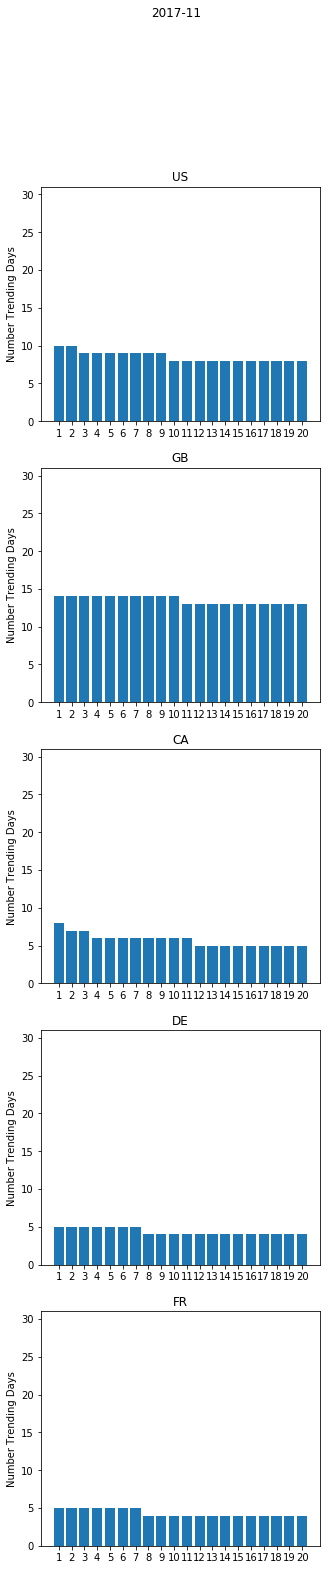

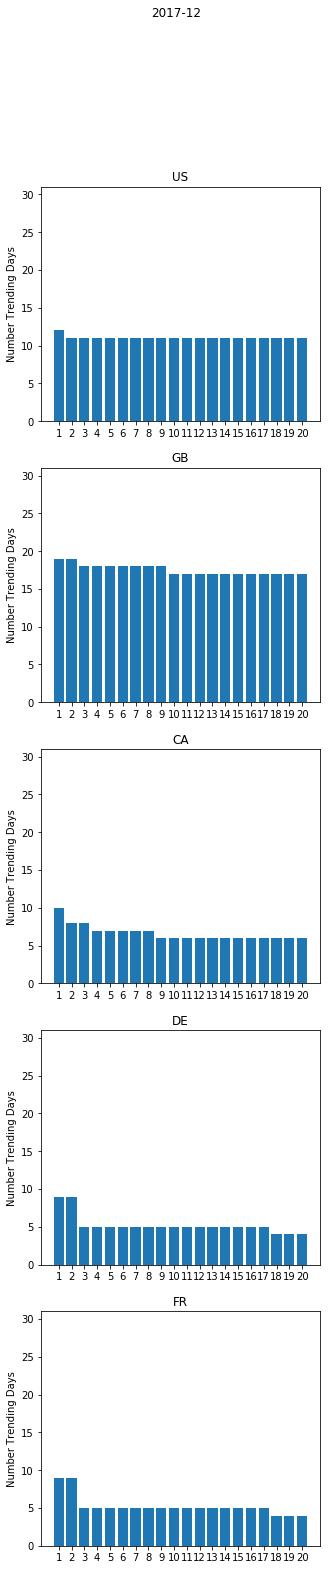

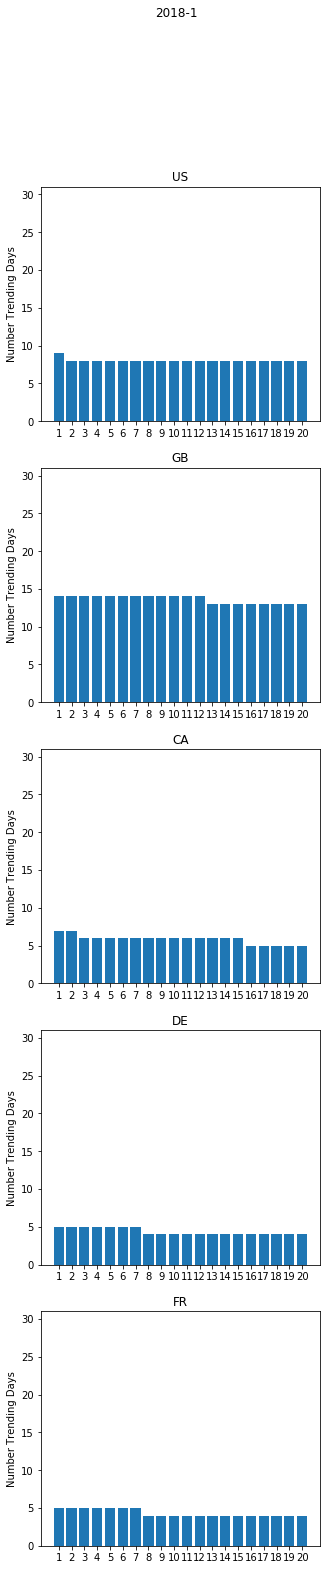

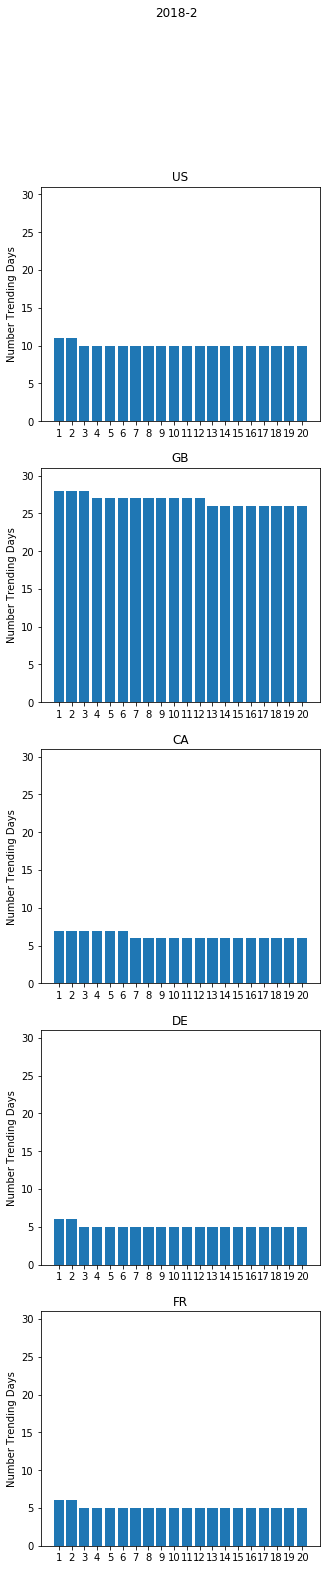

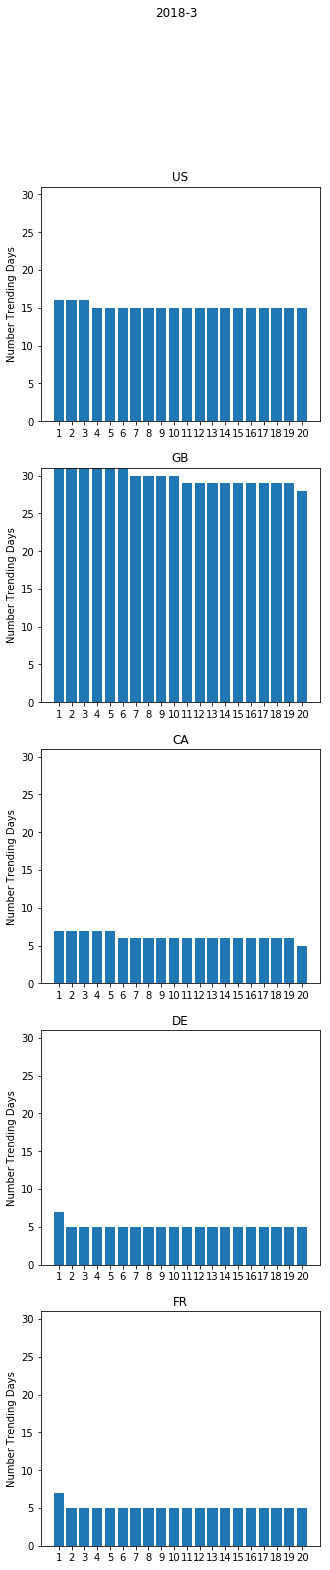

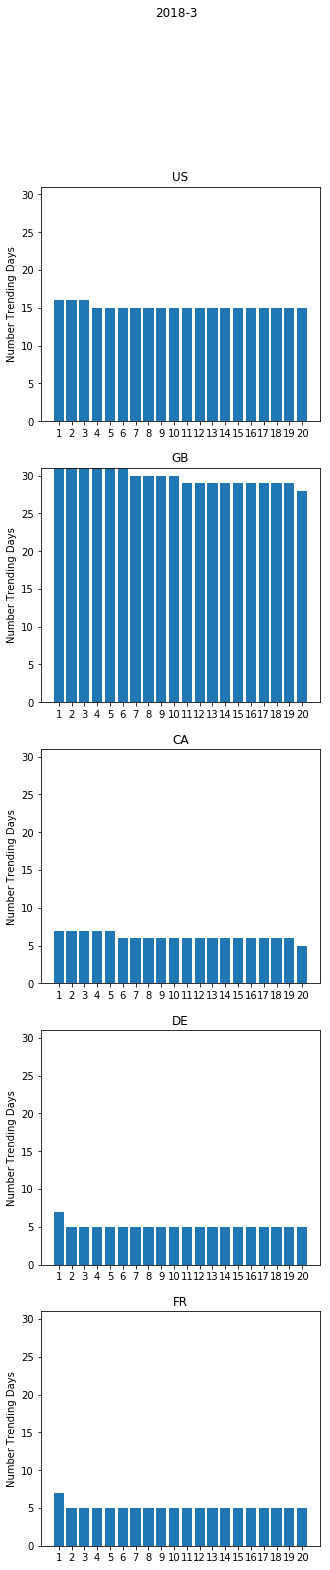

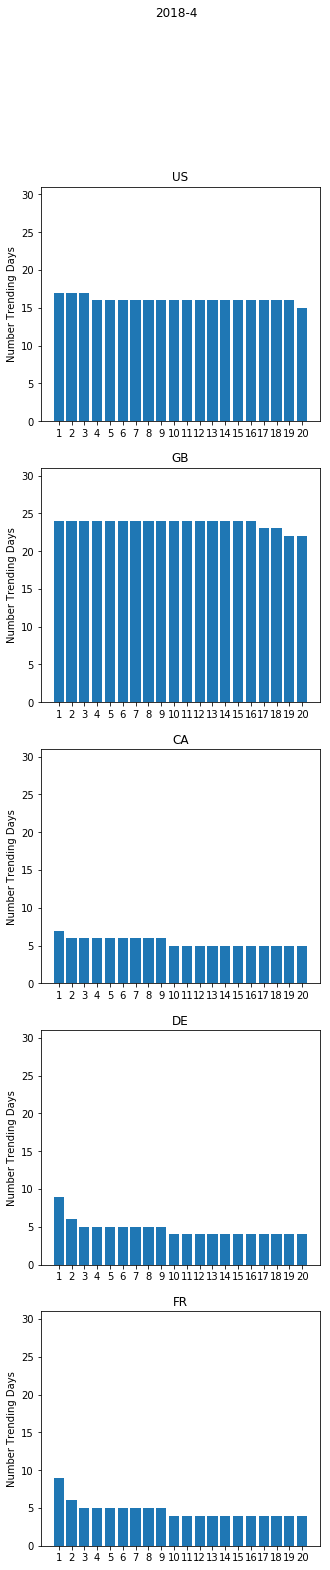

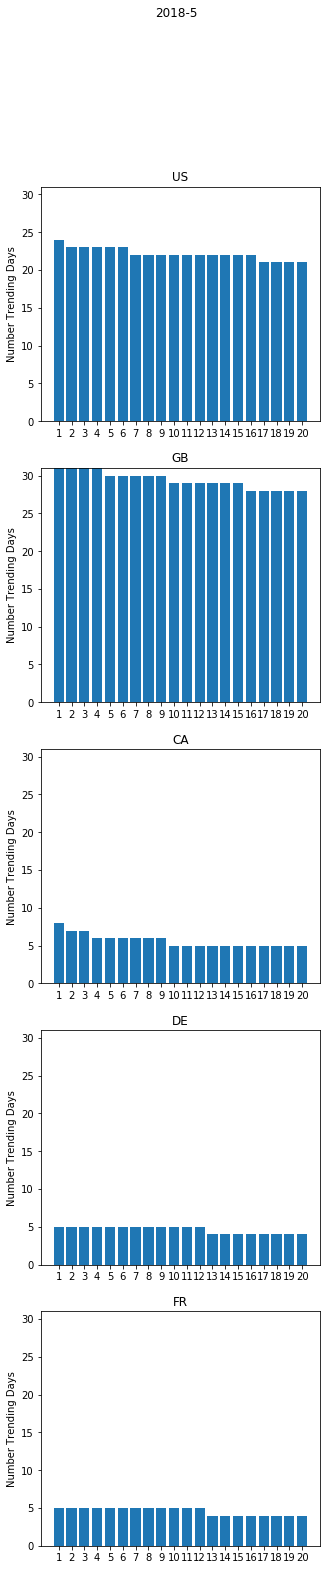

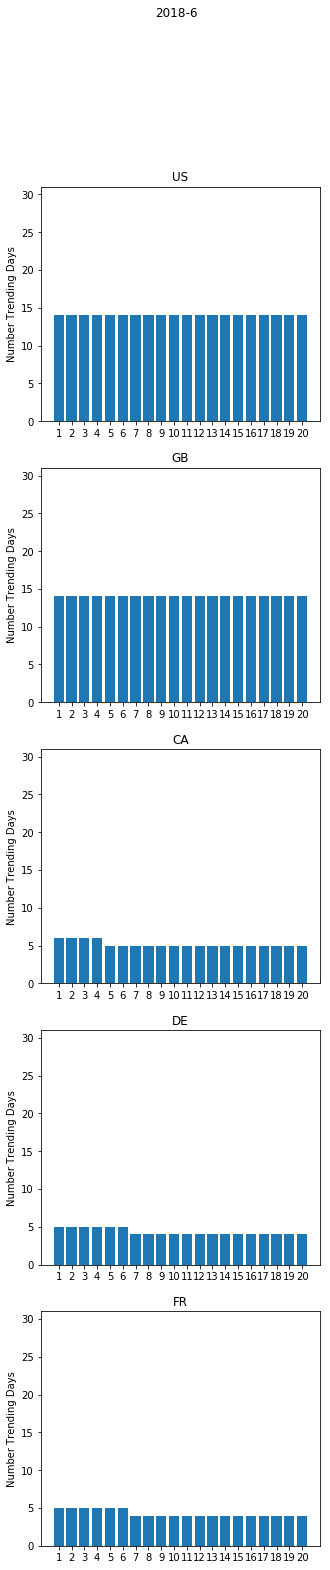

In [10]:
months = ['2017-11','2017-12','2018-1','2018-2','2018-3','2018-3','2018-4','2018-5','2018-6']
for month in months:
    us = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth']==month,:]
    gb = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth']==month,:]
    ca = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth']==month,:]
    de = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth']==month,:]
    fr = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth']==month,:]
    plt.figure(figsize=(5,25))
    plt.suptitle(f'{month}')
    plt.subplot(5,1,1,)
    plt.bar(np.arange(20),us['video_id_count'])
    plt.title('US')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days')
    plt.subplot(5,1,2)
    plt.bar(np.arange(20),gb['video_id_count'])
    plt.title('GB')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days')
    plt.subplot(5,1,3)  
    plt.bar(np.arange(20),ca['video_id_count'])
    plt.title('CA')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days')
    plt.subplot(5,1,4)   
    plt.bar(np.arange(20),de['video_id_count'])
    plt.title('DE')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days')
    plt.subplot(5,1,5)    
    plt.bar(np.arange(20),fr['video_id_count'])
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.title('FR')
    plt.ylabel('Number Trending Days')
    plt.savefig('Views_{month}.png')

# Category Overlap across countries

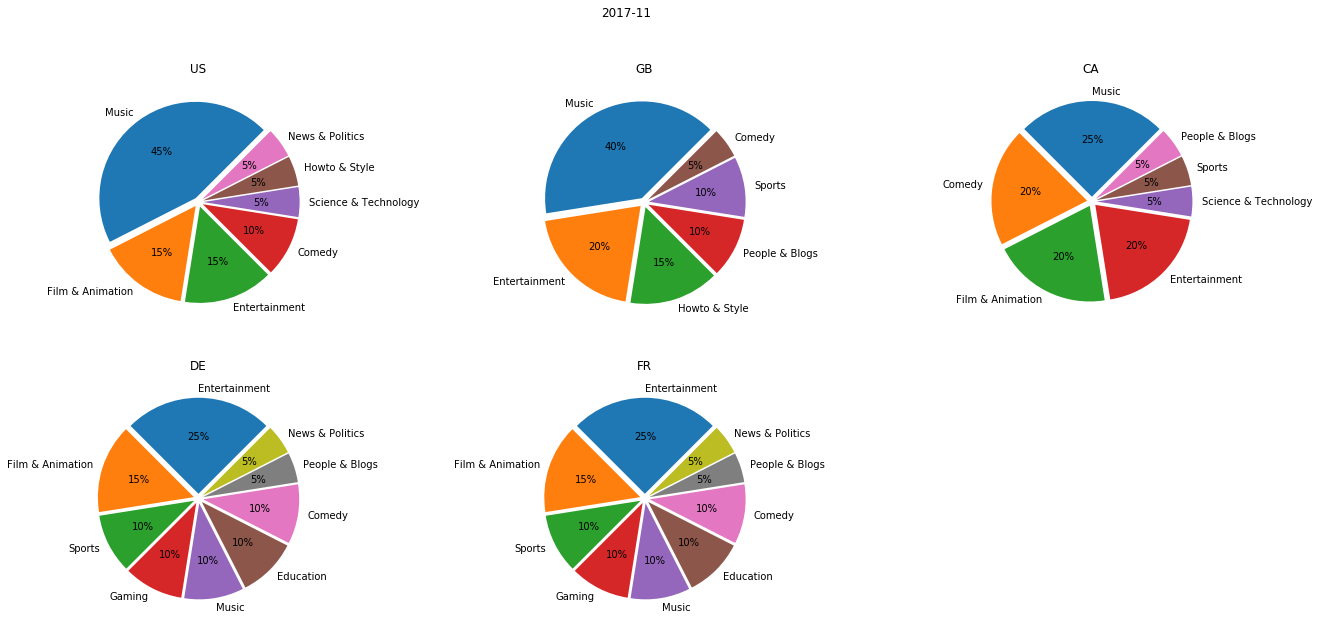

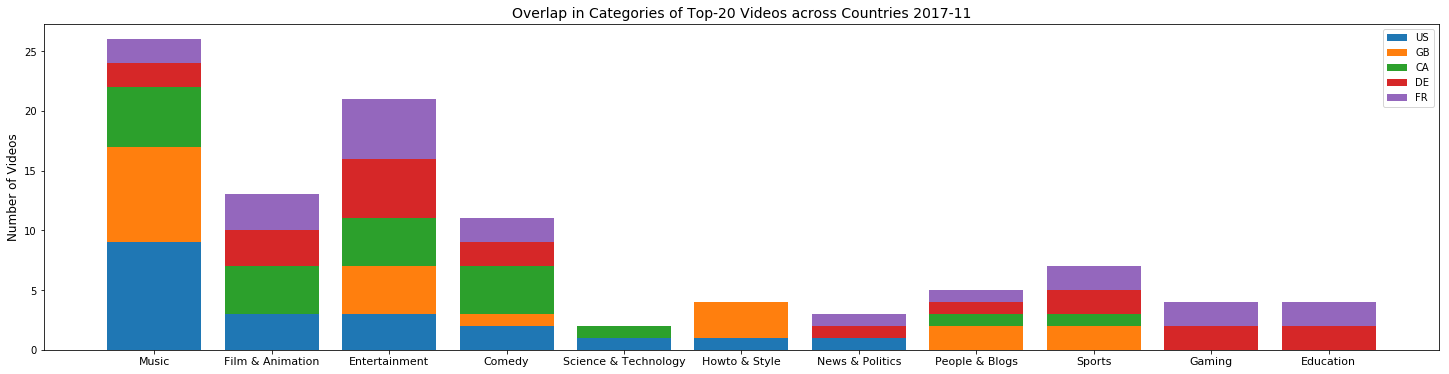

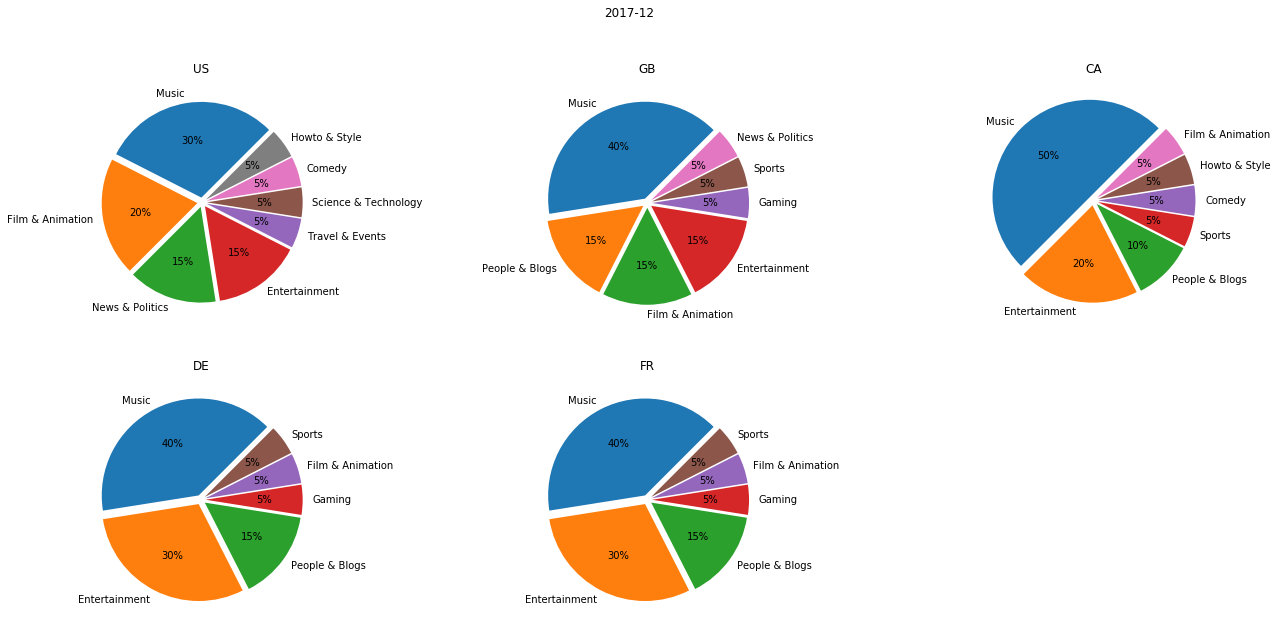

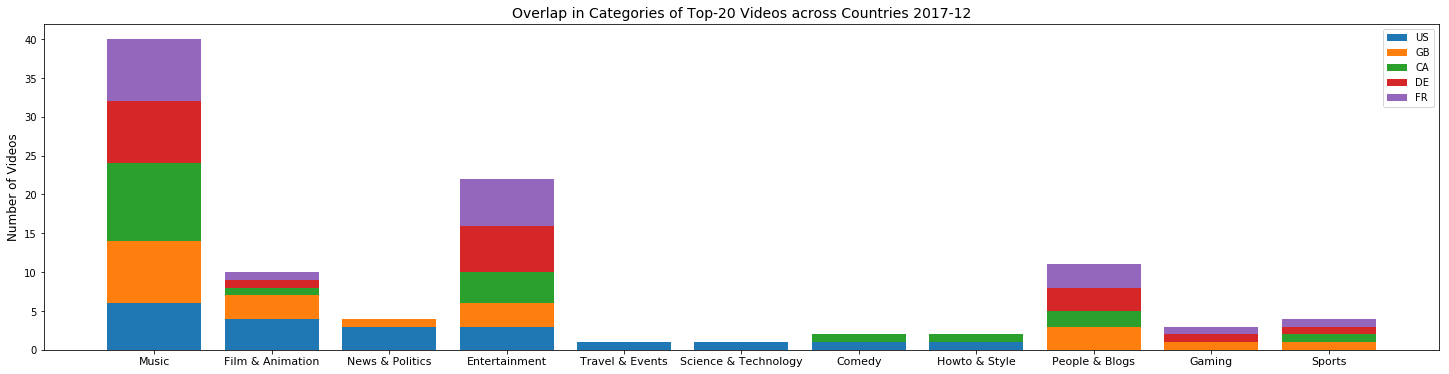

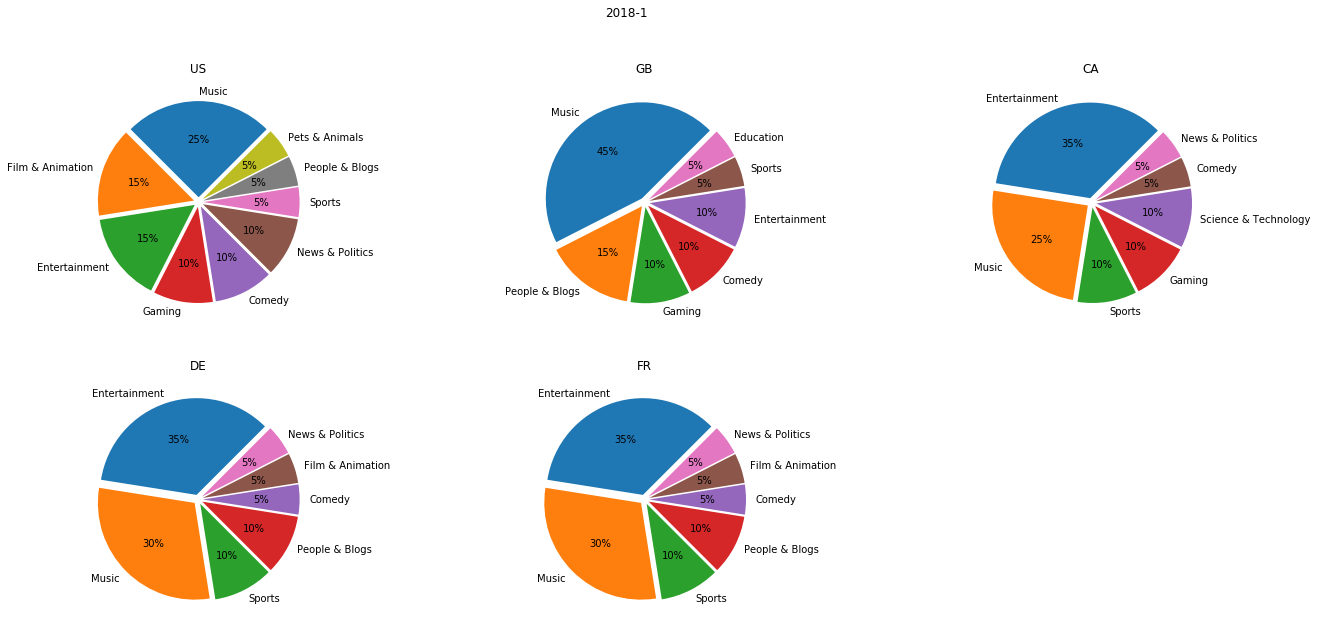

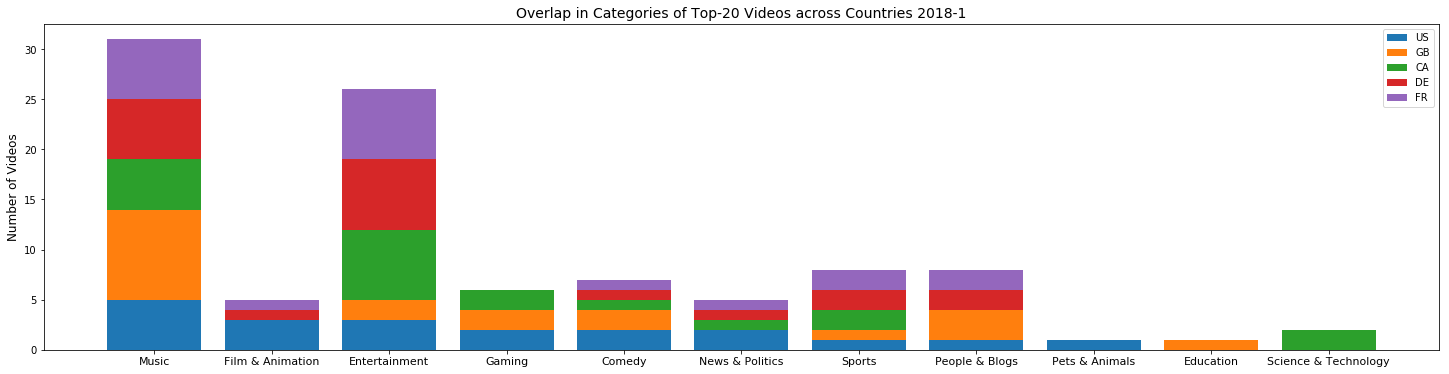

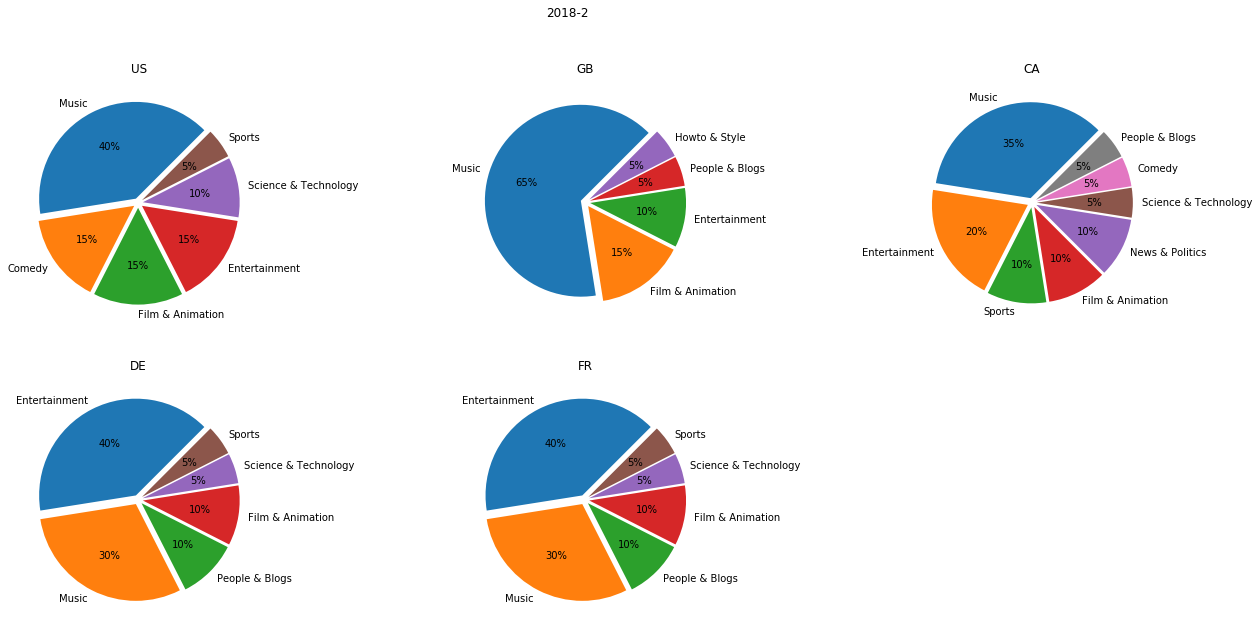

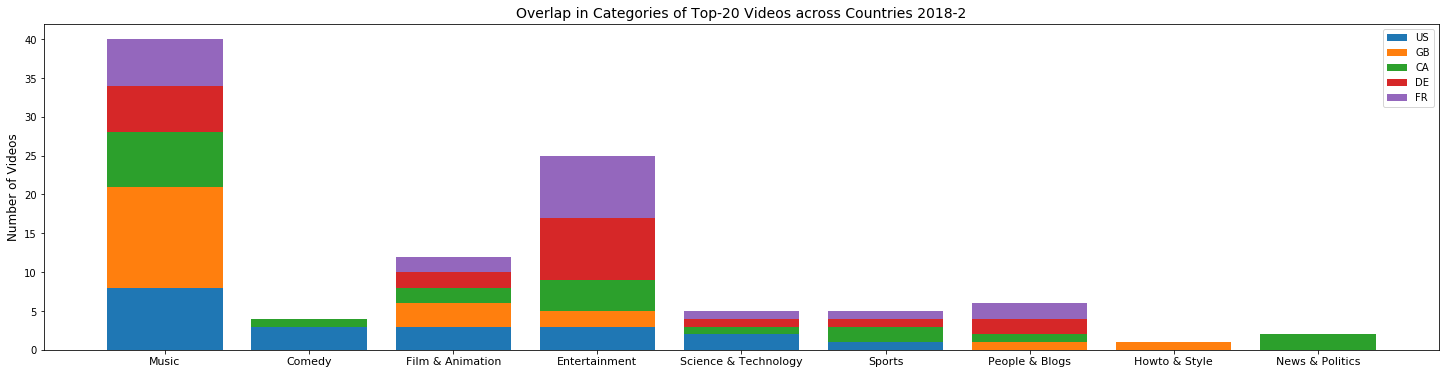

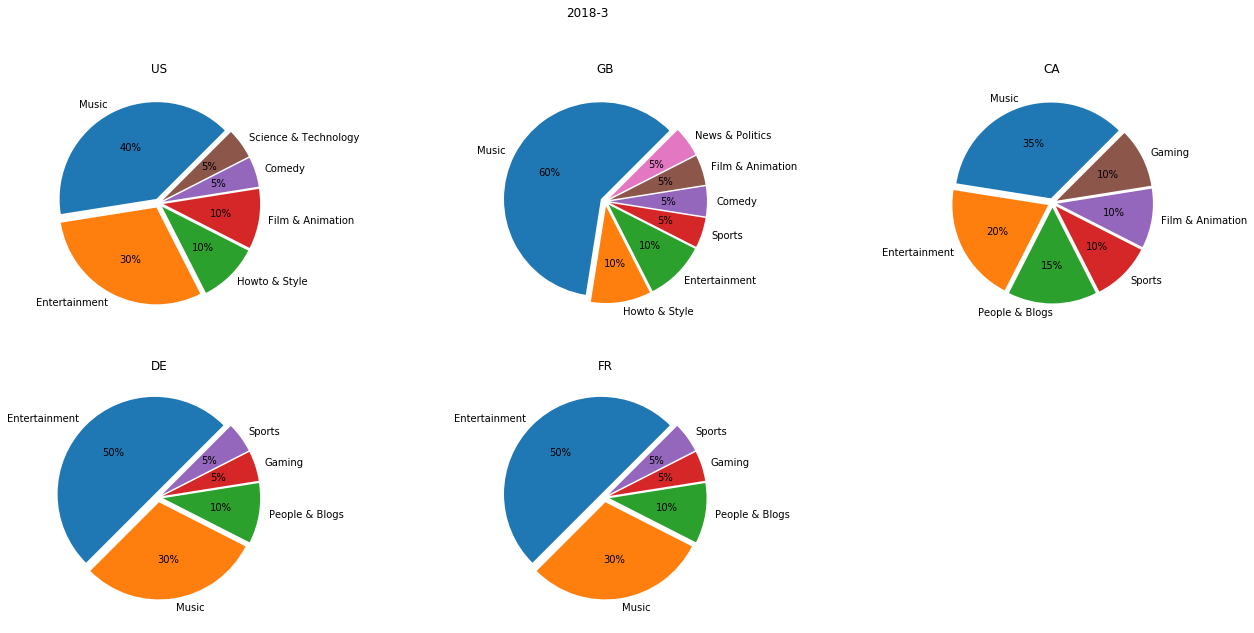

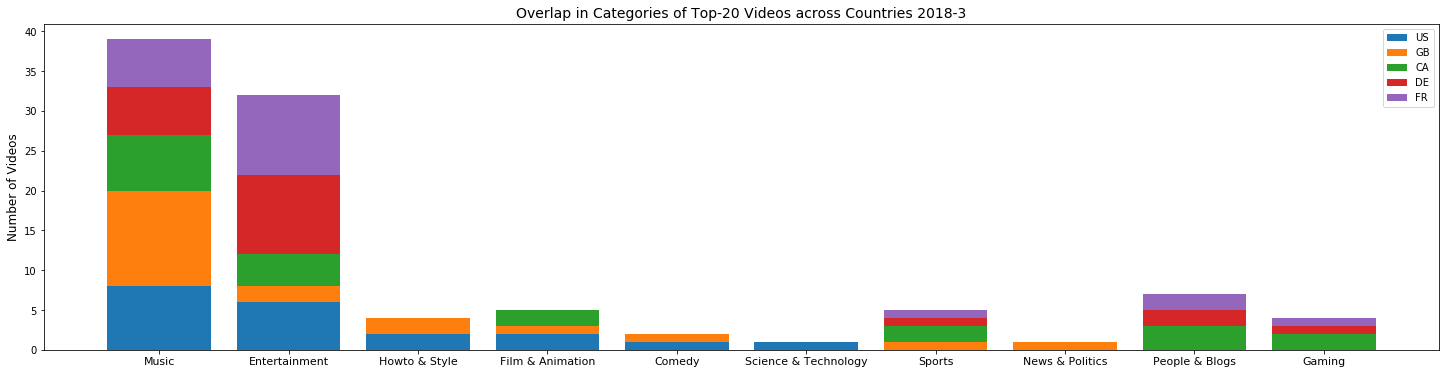

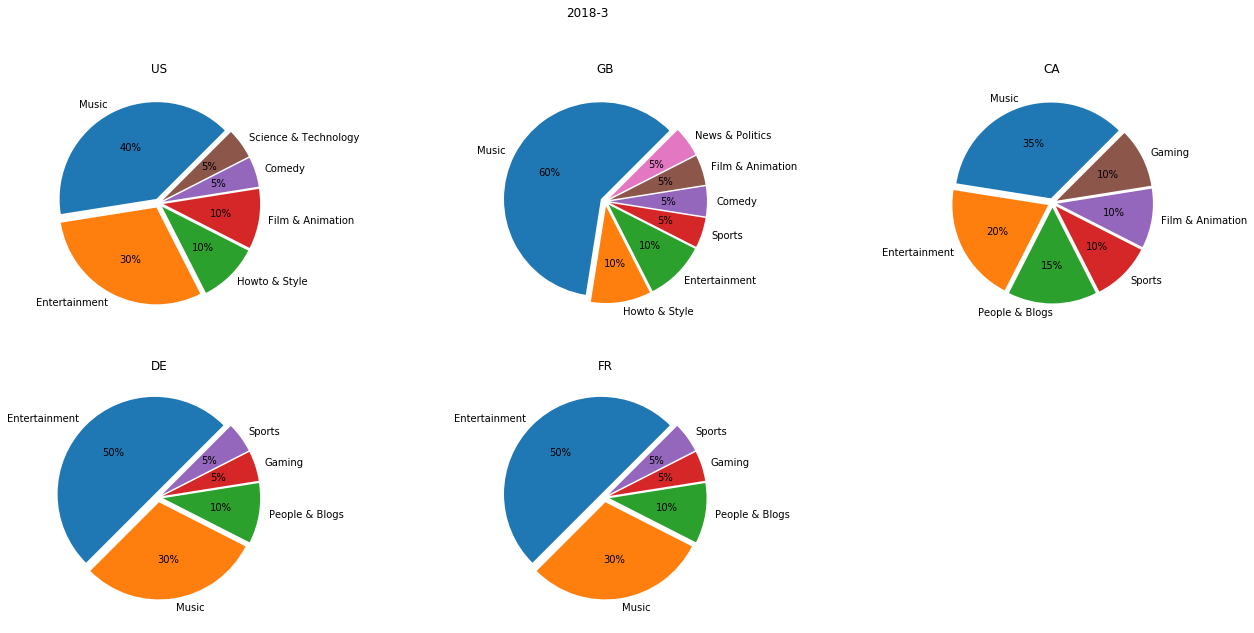

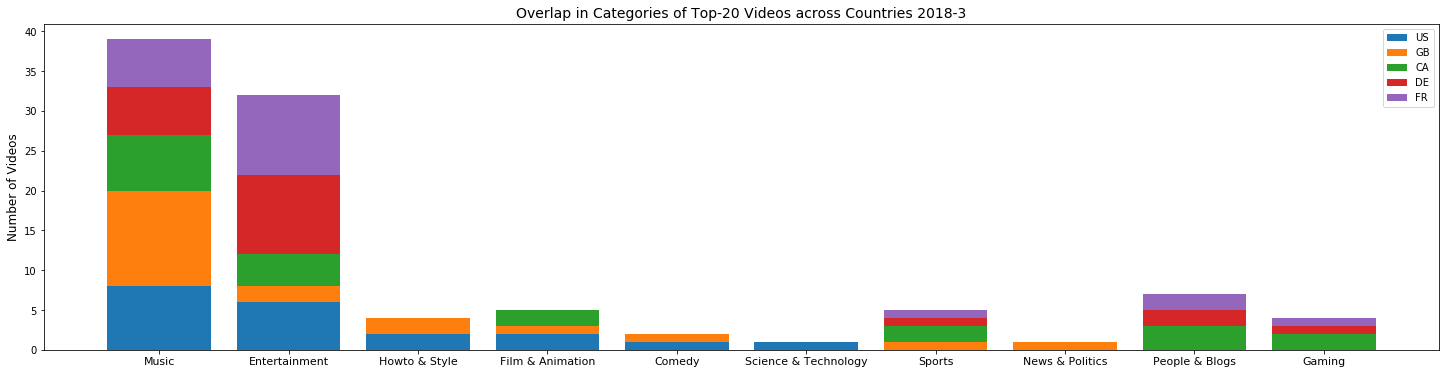

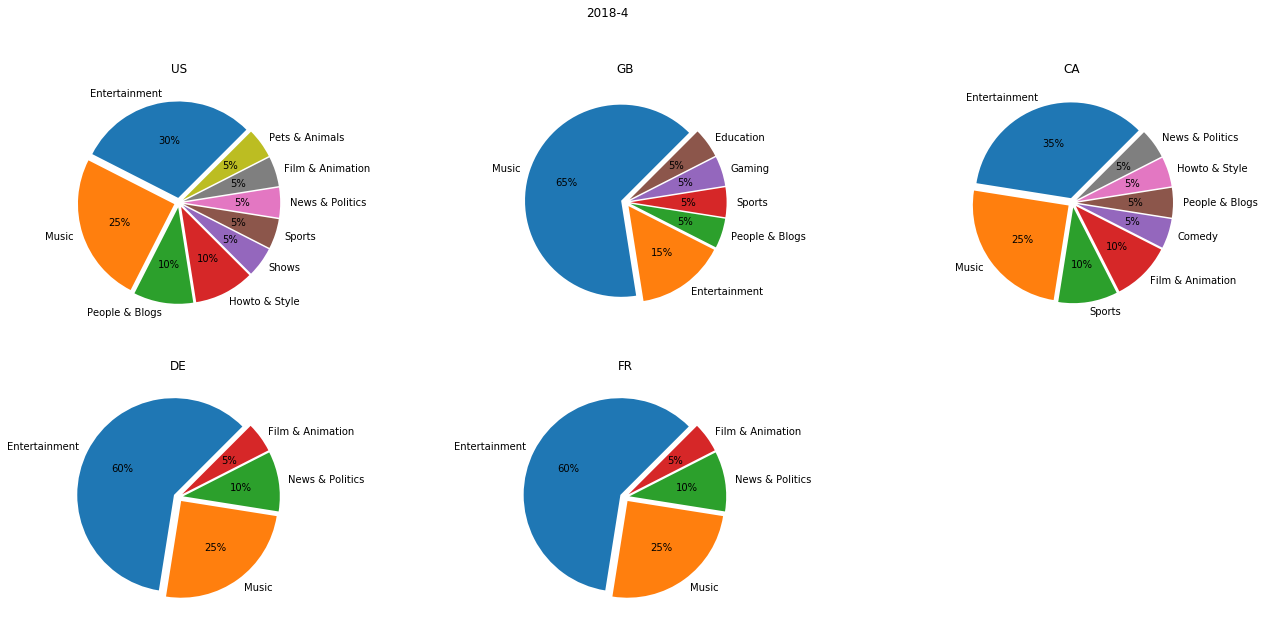

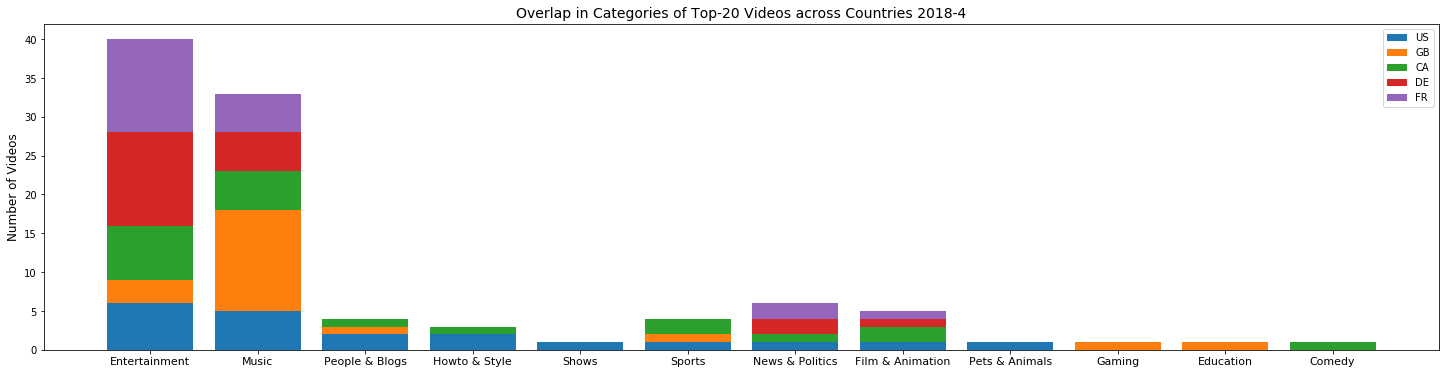

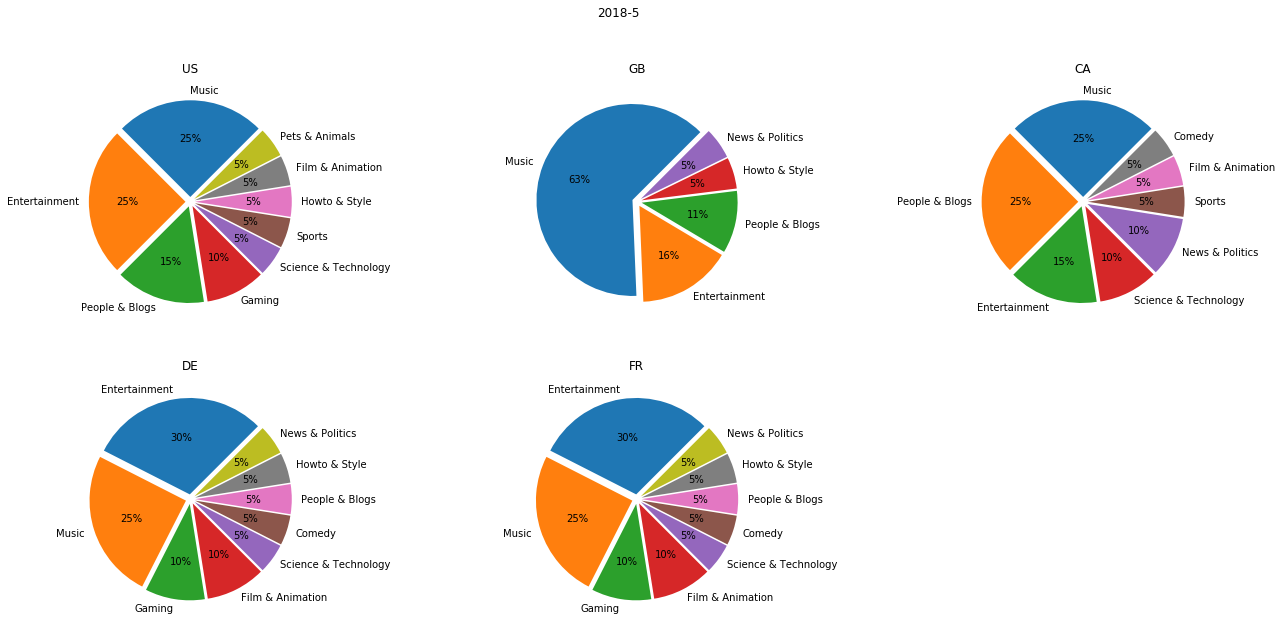

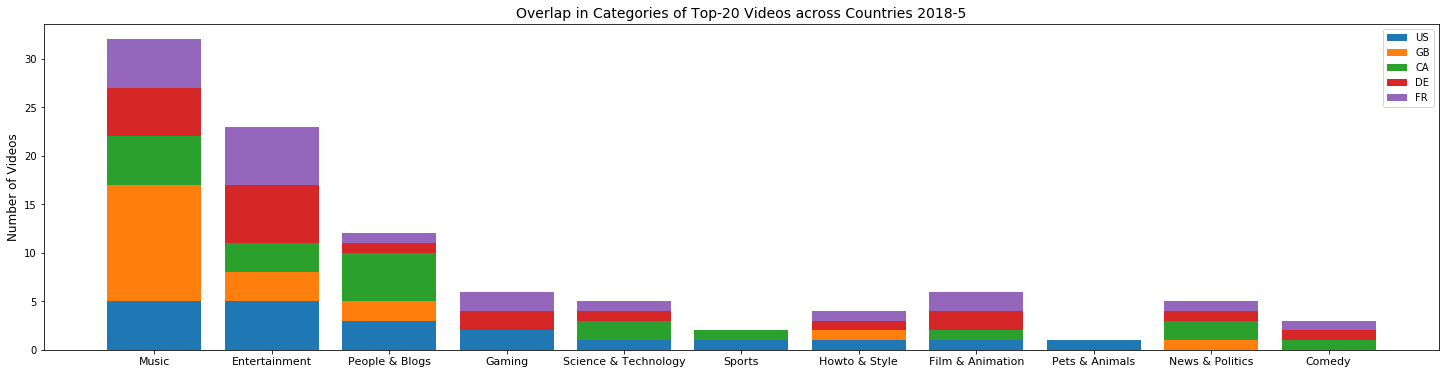

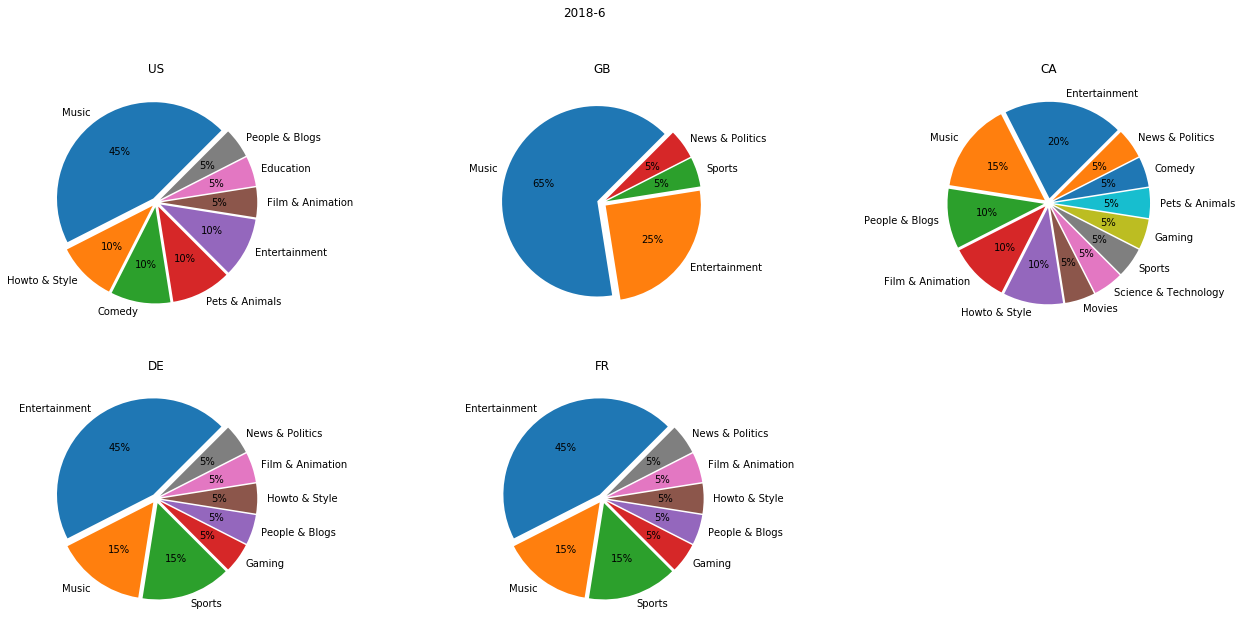

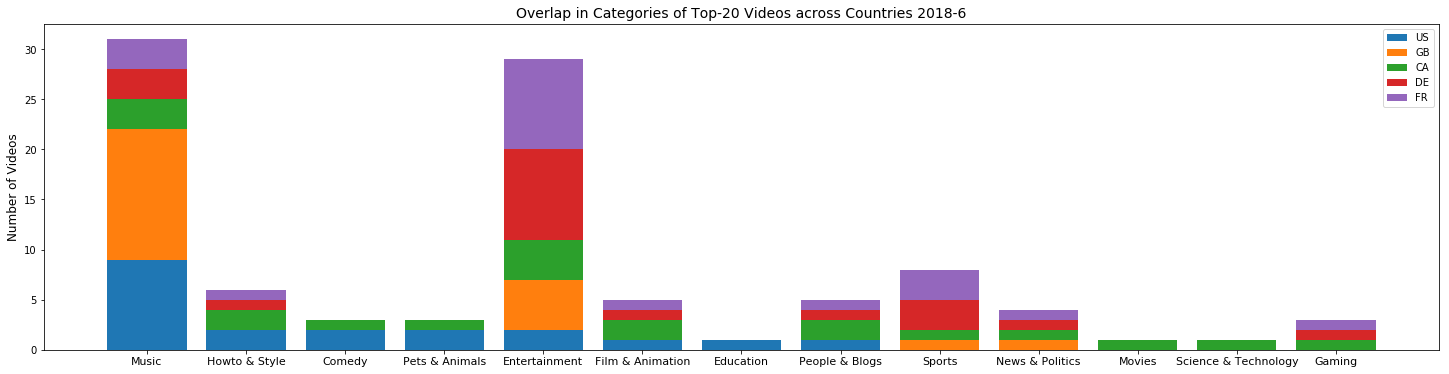

In [11]:
for month in months:
    us_cat = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    gb_cat = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    ca_cat = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    de_cat = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    fr_cat = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    
    # plot pie charts
    plt.figure(figsize=(20,10))
    plt.suptitle(f'{month}')
    plt.subplot(2,3,1)
    plt.pie(us_cat,labels = us_cat.index, explode = [.05 for x in np.arange(len(us_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('US')
    plt.subplot(2,3,2)
    plt.pie(gb_cat,labels = gb_cat.index, explode = [.05 for x in np.arange(len(gb_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('GB')
    plt.subplot(2,3,3)
    plt.pie(ca_cat,labels = ca_cat.index, explode = [.05 for x in np.arange(len(ca_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('CA')
    plt.subplot(2,3,4)
    plt.pie(de_cat,labels = de_cat.index, explode = [.05 for x in np.arange(len(de_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('DE')
    plt.subplot(2,3,5)
    plt.pie(fr_cat,labels = fr_cat.index, explode = [.05 for x in np.arange(len(fr_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('FR')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
    plt.savefig(f"Pie_{month}.png")
    
    # plot stacked bar charts
    unique_cats = us_cat.index.append(gb_cat.index).append(ca_cat.index).append(de_cat.index).append(fr_cat.index).unique()
    cats = {}
    for key in unique_cats:
        cats[key]=0
    us_dict = us_cat.to_dict()
    us_cats = cats.copy()
    for item in us_dict:
        us_cats[item]=us_cats[item]+us_dict[item]

    gb_dict = gb_cat.to_dict()
    gb_cats = cats.copy()
    for item in gb_dict:
        gb_cats[item]=gb_cats[item]+gb_dict[item] 

    ca_dict = ca_cat.to_dict()
    ca_cats = cats.copy()
    for item in ca_dict:
        ca_cats[item]=ca_cats[item]+ca_dict[item] 

    de_dict = de_cat.to_dict()
    de_cats = cats.copy()
    for item in de_dict:
        de_cats[item]=de_cats[item]+de_dict[item] 
        
    fr_dict = fr_cat.to_dict()
    fr_cats = cats.copy()
    for item in fr_dict:
        fr_cats[item]=fr_cats[item]+fr_dict[item] 
    plt.figure(figsize = (25,6))
    p1= plt.bar(us_cats.keys(),us_cats.values())
    plt.ylabel("Number of Videos", fontsize = 12)
    plt.xticks(list(us_cats.keys()),fontsize = 11)
    plt.title(f"Overlap in Categories of Top-20 Videos across Countries {month}", fontsize = 14)
    bottom_us = list(us_cats.values())
    p2 = plt.bar(gb_cats.keys(),gb_cats.values(), bottom=bottom_us)
    bottom_gb = list(gb_cats.values())
    bottom_us_gb = [sum(x) for x in zip(bottom_us,bottom_gb)]
    p3 = plt.bar(ca_cats.keys(),ca_cats.values(), bottom=bottom_us_gb)
    bottom_ca = list(ca_cats.values())
    bottom_us_gb_ca = [sum(x) for x in zip(bottom_us_gb,bottom_ca)]
    p4 = plt.bar(de_cats.keys(),de_cats.values(), bottom=bottom_us_gb_ca)
    bottom_de = list(de_cats.values())
    bottom_us_gb_ca = [sum(x) for x in zip(bottom_us_gb_ca,bottom_de)]
    p5 = plt.bar(de_cats.keys(),de_cats.values(), bottom=bottom_us_gb_ca)
    plt.legend((p1,p2,p3,p4,p5),("US",'GB','CA','DE','FR'))
    plt.savefig(f"stacked_bar_{month}.png")

# Video overlap rates across countries

In [12]:
us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth'] == '2017-11']['title']

0                 Incredibles 2 Official Teaser Trailer
1             Luis Fonsi, Demi Lovato - Échame La Culpa
2     A Quiet Place (2018) - Official Teaser Trailer...
3                 A Wrinkle in Time Official US Trailer
4     Binging with Babish: Rachel's Trifle from Friends
5     Bus Photobombs The Weather Channel's Stream of...
6     Hailee Steinfeld, Alesso - Let Me Go ft. Flori...
7              P!nk - Beautiful Trauma (Official Video)
8                     Selena Gomez, Marshmello - Wolves
9     (HD VERSION) Kelly Clarkson & P!nk Everybody H...
10                   BEST Black Friday Tech Deals 2017!
11    BTS Sings Camila Cabello's 'Havana' & Shows Of...
12    Brad and Sean Evans Make Cast-Iron Pizza | It'...
13    Brent Pella - Why You Shouldn't Fly on Spirit ...
14    Bruno Mars - Live At The Apollo Theater [Offic...
15                 Cards Against Humanity Saves America
16    Chris Stapleton - Tryin' To Untangle My Mind (...
17    Christina Aguilera - Whitney Houston Tribu

In [13]:
months

['2017-11',
 '2017-12',
 '2018-1',
 '2018-2',
 '2018-3',
 '2018-3',
 '2018-4',
 '2018-5',
 '2018-6']

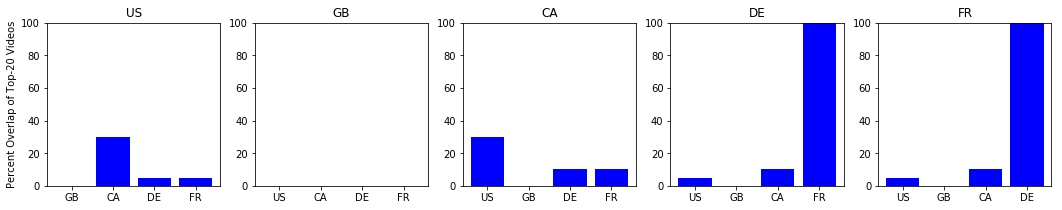

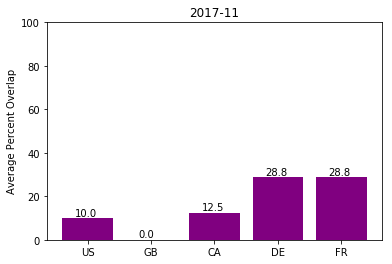

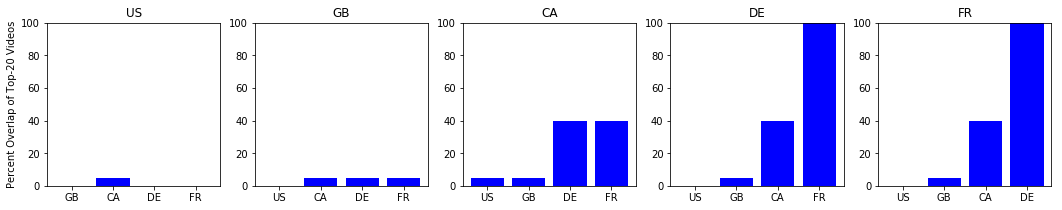

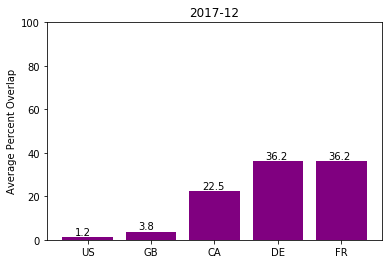

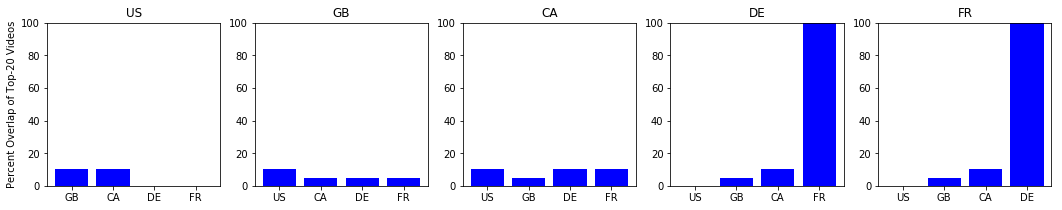

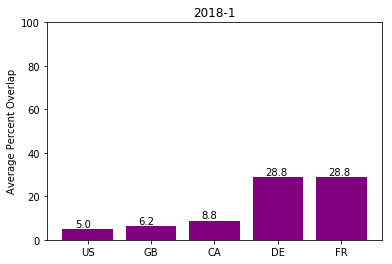

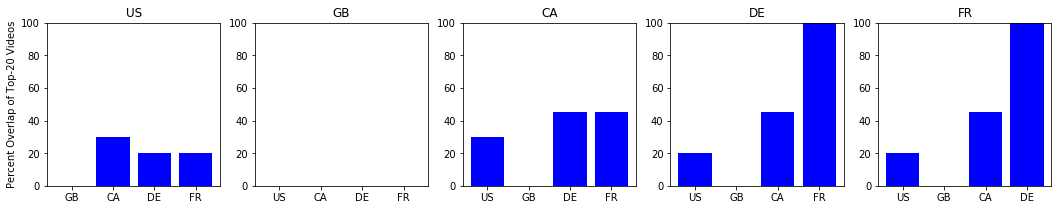

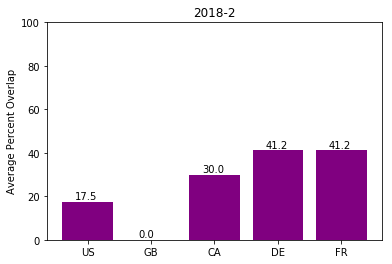

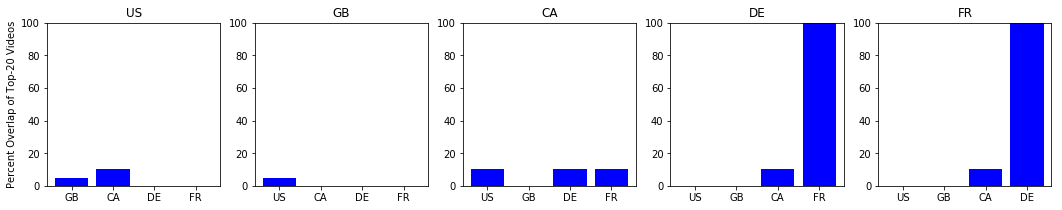

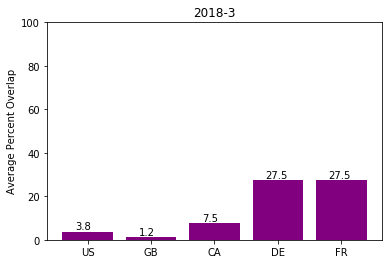

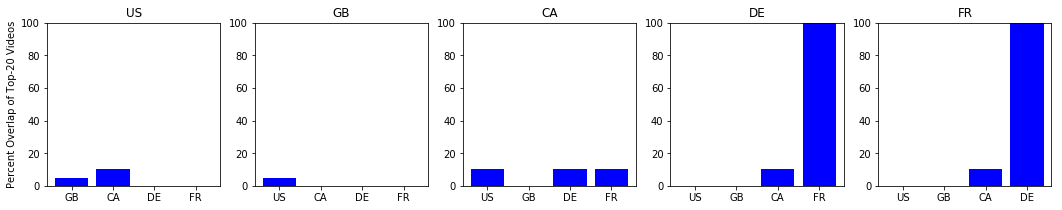

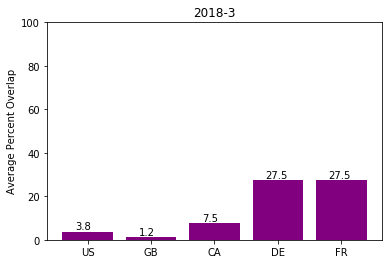

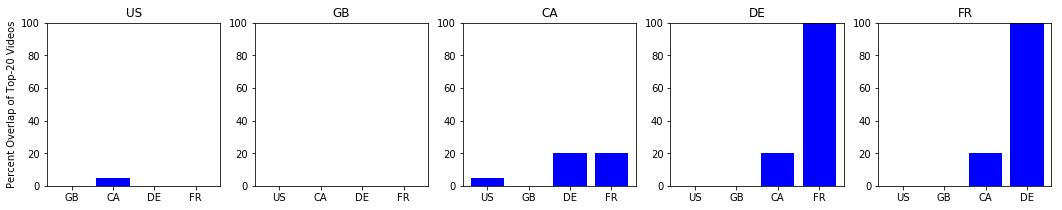

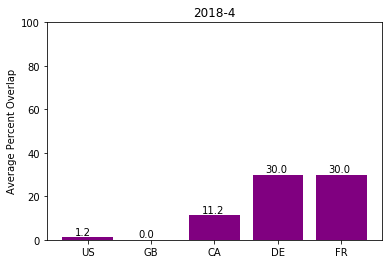

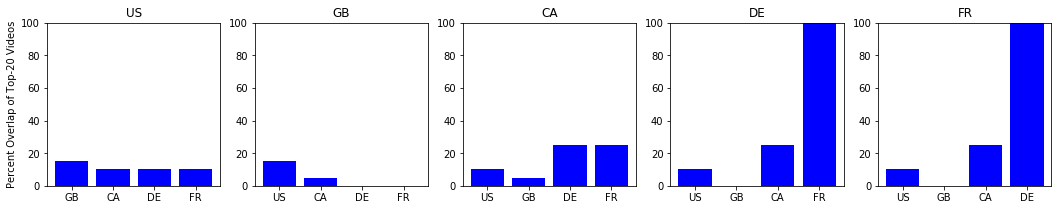

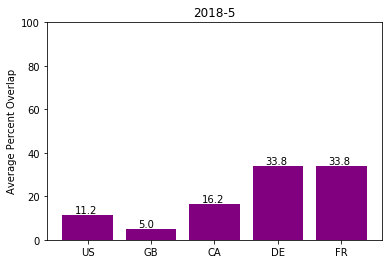

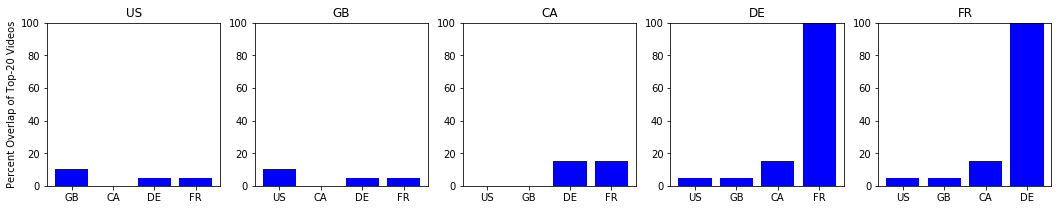

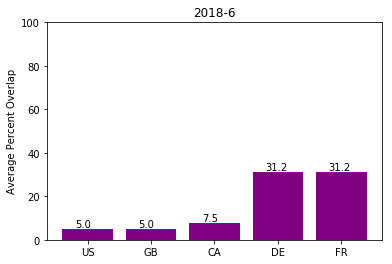

In [35]:
for month in months:
    us_title = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth'] == month]['title']
    gb_title = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth'] == month]['title']
    ca_title = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth'] == month]['title']
    de_title = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth'] == month]['title']
    fr_title = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth'] == month]['title']

    count = 0
    for item in gb_title:
        if item in list(us_title):
            count = count + 1
    us_gb_overlap = int(count/20*100)
    
    
#     count = 0
#     try: for item in gb_title:
#             if item in list(us_title):
#                 count = count + 1
#                 us_gb_overlap = int(count/20*100)
#     except ()
            

    count = 0
    for item in ca_title:
        if item in list(us_title):
            count = count + 1
    us_ca_overlap = int(count/20*100)
        
    
    count = 0
    for item in de_title:
        if item in list(us_title):
            count = count + 1
    us_de_overlap = int(count/20*100)

    count = 0
    for item in fr_title:
        if item in list(us_title):
            count = count + 1
    us_fr_overlap = int(count/20*100)

    count = 0
    for item in ca_title:
        if item in list(gb_title):
            count = count + 1
    gb_ca_overlap = int(count/20*100)

    count = 0
    for item in de_title:
        if item in list(gb_title):
            count = count + 1
    gb_de_overlap = int(count/20*100)

    count = 0
    for item in fr_title:
        if item in list(gb_title):
            count = count + 1
    gb_fr_overlap = int(count/20*100)

    count = 0
    for item in de_title:
        if item in list(ca_title):
            count = count + 1
    ca_de_overlap = int(count/20*100)
    
    count = 0
    for item in fr_title:
        if item in list(ca_title):
            count = count + 1
    ca_fr_overlap = int(count/20*100)
    
    count = 0
    for item in fr_title:
        if item in list(de_title):
            count = count + 1
    de_fr_overlap = int(count/20*100)
        
    
    countries = ['US','GB','CA','DE','FR']
    us_overlaps = [us_gb_overlap,us_ca_overlap,us_de_overlap,us_fr_overlap]
    us_mean = np.mean(us_overlaps)
    gb_overlaps = [us_gb_overlap,gb_ca_overlap,gb_de_overlap,gb_fr_overlap]
    gb_mean = np.mean(gb_overlaps)
    ca_overlaps = [us_ca_overlap,gb_ca_overlap,ca_de_overlap,ca_fr_overlap]
    ca_mean = np.mean(ca_overlaps)
    de_overlaps = [us_de_overlap,gb_de_overlap,ca_de_overlap,de_fr_overlap]
    de_mean = np.mean(de_overlaps)
    fr_overlaps = [us_fr_overlap,gb_fr_overlap,ca_fr_overlap,de_fr_overlap]
    fr_mean = np.mean(fr_overlaps)
    
    plt.figure(figsize = (18,3))
    plt.subplot(1,5,1)
    plt.bar(x= ['GB','CA','DE','FR'],height=us_overlaps,color='blue')
    plt.ylim(0,100)
    plt.ylabel("Percent Overlap of Top-20 Videos")
    plt.title("US")
    plt.subplot(1,5,2)
    plt.bar(x=['US','CA','DE','FR'],height=gb_overlaps,color='blue')
    plt.title("GB")
    plt.ylim(0,100)
    plt.subplot(1,5,3)
    plt.bar(x=['US','GB','DE','FR'],height=ca_overlaps,color='blue')
    plt.title("CA")
    plt.ylim(0,100)
    plt.subplot(1,5,4)
    plt.bar(x=['US','GB','CA','FR'],height=de_overlaps,color='blue')
    plt.title("DE")
    plt.ylim(0,100)
    plt.subplot(1,5,5)
    plt.bar(x=['US','GB','CA','DE'],height=fr_overlaps,color='blue')
    plt.title("FR")
    plt.ylim(0,100)
    plt.show()
    plt.bar(countries,height=[us_mean,gb_mean,ca_mean,de_mean,fr_mean],color='purple')
    plt.ylabel("Average Percent Overlap")
    plt.title(f'{month}')
    plt.ylim(0,100)
    plt.annotate(f'{us_mean:.1f}',xy=(0-.2,us_mean +1))
    plt.annotate(f'{gb_mean:.1f}',xy=(1-.2,gb_mean +1))
    plt.annotate(f'{ca_mean:.1f}',xy=(2-.2,ca_mean +1))
    plt.annotate(f'{de_mean:.1f}',xy=(3-.2,de_mean +1))
    plt.annotate(f'{fr_mean:.1f}',xy=(4-.2,fr_mean +1))
    plt.savefig(f'Overlap_rate_{month}.png')
    

# Video overlap scatter plots

In [48]:
for month in months:
    us = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth']==month,:]
    gb = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth']==month,:]
    ca = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth']==month,:]
    de = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth']==month,:]
    fr = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth']==month,:]
    us_dict = dict(zip(us['title'],us['video_id_count']))
    gb_dict = dict(zip(gb['title'],gb['video_id_count']))
    ca_dict = dict(zip(ca['title'],ca['video_id_count']))
    de_dict = dict(zip(de['title'],de['video_id_count']))
    fr_dict = dict(zip(fr['title'],fr['video_id_count']))
    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(20),us_dict.values(), s =20* np.array((us_dict.values())), color = 'purple')
    plt.title(f'{month}_US')
    plt.ylim(0,31)
    plt.ylabel('Number of Trending Days')
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_1.png')
    plt.show()
    us_gb_dict = us_dict.copy()
    for video in gb_dict.keys():
        if video in us_gb_dict.keys():
            us_gb_dict[video] = us_gb_dict[video] + gb_dict[video]
    plt.scatter(np.arange(20),us['video_id_count'], s = 50*(list(us_gb_dict.values())), color = 'purple')
    plt.title(f'{month}_US_GB')
    plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_2.png')
    plt.show()
    us_gb_ca_dict = us_gb_dict.copy()
    for video in ca_dict.keys():
        if video in us_gb_ca_dict.keys():
            us_gb_ca_dict[video] = us_gb_ca_dict[video] + ca_dict[video]
    plt.scatter(np.arange(20),us['video_id_count'], s = 50*(np.array(us_gb_ca_dict.values())), color = 'purple')
    plt.title(f'{month}_US_GB_CA')
    plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_3.png')
    plt.show()
    us_gb_ca_de_dict = us_gb_ca_dict.copy()
    for video in de_dict.keys():
        if video in us_gb_ca_de_dict.keys():
            us_gb_ca_de_dict[video] = us_gb_ca_de_dict[video] + de_dict[video]
    plt.scatter(np.arange(20),us['video_id_count'], s = 10*list(us_gb_ca_de_dict.values()), color = 'purple')
    plt.title(f'{month}_US_GB_CA_DE')
    plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_4.png')
    plt.show()
    us_gb_ca_de_fr_dict = us_gb_ca_de_dict.copy()
    for video in fr_dict.keys():
        if video in us_gb_ca_de_fr_dict.keys():
            us_gb_ca_de_fr_dict[video] = us_gb_ca_de_fr_dict[video] + fr_dict[video]
    plt.scatter(np.arange(20),us['video_id_count'], s = 10*list(us_gb_ca_de_fr_dict.values()), color = 'purple')
    plt.title(f'{month}_US_GB_CA_DE_FR')
    plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_5.png')
    plt.show()

TypeError: unsupported operand type(s) for *: 'int' and 'dict_values'

<Figure size 1440x360 with 0 Axes>